# **Collecte de Données :**

In [ ]:
#corpus = """A devious serial killer is hiding in plain sight. No one is safe in this small town. Not even FBI Agent Tanya Stone…Paradise Cove is the perfect vacation getaway.
#So, FBI Agent Tanya Stone thinks...Until a Porsche slams into the cafe where she and her detective friends are enjoying a morning coffee.
#A USA Today bestseller!‘a fascinating novel that gives a real sense of life as it might have been during one of the most turbulent periods in Irish history... A woman is found by a track, nearly dead from appalling wounds and remembers nothing.
#It's Christmas in Washington, but not for one heartsick family.Agent Shane Murphy has a hard time believing his life could get so crazy.
#Because of a choice – one he'd make again – he loses his superiority in the FBI. Now he's forced to work surveillance with a rookie female yapper.
#She was their only hope. Now they are hers. A gritty, heartbreaking and unforgettable story of love and hope in the darkest of times. Clara Newton is the new
#Housemother of Shilling Grange Orphanage.Her family’s successful winery business in a small town in upstate New York should have gone to Tessa Price. She’d always dreamed of
#running the winery, but her brother, the prodigal son returns to claim the corner office. """

#corpus = """The evolution of communication technology has transformed the way we connect and share information. From the invention of the printing press to the rise of the internet, communication has constantly evolved.
#Exploring the depths of the oceans has unveiled a rich tapestry of marine life. Oceanographers and marine biologists continue to make discoveries that contribute to our understanding of the underwater world.
#Societal changes driven by globalization have led to a blending of cultures. The exchange of ideas, traditions, and customs on a global scale has created a more interconnected and diverse world.The impact of social media on modern communication is profound. It has reshaped how information is disseminated, opinions are formed, and communities are built.Advancements in medical science have led to breakthroughs in treating previously incurable diseases."""

corpus = """
The notes resonate, creating a captivating symphony, transcending linguistic barriers. Music, a universal language, transports the listener to unexplored emotional worlds.

At the summit of a mountain, silence reigns before the sunrise. Nature awakens, revealing the tranquil magic of persistent life. Birds initiate their morning melody. Leaves rustle gently with the caress of the wind. Each dawn becomes a unique canvas painted by the light of the emerging day.

Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine. Codes and algorithms shape our interaction with the digital world.
"""

In [ ]:
paragraphs = [paragraph.strip() for paragraph in corpus.split('\n') if paragraph.strip()]
sentences = [sentence.strip() for paragraph in paragraphs for sentence in paragraph.split('.') if sentence.strip()]

In [ ]:
sentences

['The notes resonate, creating a captivating symphony, transcending linguistic barriers',
 'Music, a universal language, transports the listener to unexplored emotional worlds',
 'At the summit of a mountain, silence reigns before the sunrise',
 'Nature awakens, revealing the tranquil magic of persistent life',
 'Birds initiate their morning melody',
 'Leaves rustle gently with the caress of the wind',
 'Each dawn becomes a unique canvas painted by the light of the emerging day',
 'Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine',
 'Codes and algorithms shape our interaction with the digital world']

In [ ]:
paragraphs

['The notes resonate, creating a captivating symphony, transcending linguistic barriers. Music, a universal language, transports the listener to unexplored emotional worlds.',
 'At the summit of a mountain, silence reigns before the sunrise. Nature awakens, revealing the tranquil magic of persistent life. Birds initiate their morning melody. Leaves rustle gently with the caress of the wind. Each dawn becomes a unique canvas painted by the light of the emerging day.',
 'Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine. Codes and algorithms shape our interaction with the digital world.']

| text                                                                 |
|----------------------------------------------------------------------------|
| The notes resonate, creating a captivating symphony, transcending linguistic barriers |
| Music, a universal language, transports the listener to unexplored emotional worlds |
| At the summit of a mountain, silence reigns before the sunrise               |
| Nature awakens, revealing the tranquil magic of persistent life             |
| Birds initiate their morning melody                                       |
| Leaves rustle gently with the caress of the wind                           |
| Each dawn becomes a unique canvas painted by the light of the emerging day |
| Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine |
| Codes and algorithms shape our interaction with the digital world          |


In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/TALNex.csv')

train_data.head(10)

,text
0,"The notes resonate, creating a captivating sym..."
1,"Music, a universal language, transports the li..."
2,"At the summit of a mountain, silence reigns be..."
3,"Nature awakens, revealing the tranquil magic o..."
4,Birds initiate their morning melody
5,Leaves rustle gently with the caress of the wind
6,Each dawn becomes a unique canvas painted by t...
7,"Artificial intelligence simplifies our lives, ..."
8,Codes and algorithms shape our interaction wit...


# **Annotation Humaine :**

In [ ]:
annotations_inter_phrases = [
    [5,	1, 1,	2, 2,	1, 1, 1],
    [2,	3, 3,	3, 2,	1, 1],
    [3,	3, 4,	3, 4,	1],
    [5,	2, 3,	3, 1],
    [3,	2, 2,	1],
    [2, 3, 2],
    [2,	3],
    [4]
]

# Affichage de la matrice d'annotations
print("Matrice d'annotations de cohérence inter-phrastique (échelle de 1 à 5) :")
print("    ", end="")

for i in range(len(sentences)):
    print(f"{i+1}", end=" ")
print()
print()

for i in range(len(sentences)):
    row = f"{i+1}   "
    for j in range(len(sentences)):
        if i != j:
            row += f"{annotations_inter_phrases[min(i, j)][abs(i - j) - 1]} "
        else:
            row += "5 "
    print(row.strip())
annotations_entre_paragraphes = [
    [5, 3, 1],
    [3, 5, 1],
    [1, 1, 5]
]
annotations_ensemble_texte =[2]

Matrice d'annotations de cohérence inter-phrastique (échelle de 1 à 5) :
    1 2 3 4 5 6 7 8 9 

1   5 5 1 1 2 2 1 1 1
2   5 5 2 3 3 3 2 1 1
3   1 2 5 3 3 4 3 4 1
4   1 3 3 5 5 2 3 3 1
5   2 3 3 5 5 3 2 2 1
6   2 3 4 2 3 5 2 3 2
7   1 2 3 3 2 2 5 2 3
8   1 1 4 3 2 3 2 5 4
9   1 1 1 1 1 2 3 4 5


|       | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| **1** | -   | 5   | 1   | 1   | 2   | 2   | 1   | 1   | 1   |
| **2** | 5   | -   | 2   | 3   | 3   | 3   | 2   | 1   | 1   |
| **3** | 1   | 2   | -   | 3   | 3   | 4   | 3   | 4   | 1   |
| **4** | 1   | 3   | 3   | -   | 5   | 2   | 3   | 3   | 1   |
| **5** | 2   | 3   | 3   | 5   | -   | 3   | 2   | 2   | 1   |
| **6** | 2   | 3   | 4   | 4   | 3   | -   | 2   | 3   | 2   |
| **7** | 1   | 2   | 3   | 3   | 2   | 2   | -   | 2   | 3   |
| **8** | 1   | 1   | 4   | 3   | 2   | 3   | 2   | -   | 4   |
| **9** | 1   | 1   | 1   | 1   | 1   | 2   | 3   | 4   | -   |


# **Prétraitement des Données :**

In [ ]:
import nltk
import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#stopwords: les mots qui apparaissent très fréquemment mais qui n'apporte pas de sens à la phrase (comme "the", "this", "to")
stopwords = nltk.corpus.stopwords.words('english')
#proviennent d'un dictionnaire anglais
words = set(nltk.corpus.words.words())
#préserver la racine des mots
lemmatizer = WordNetLemmatizer()

In [ ]:
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :

        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation]) #enlever la ponctuation

        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit()) #enlever les chiffres

        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num) #transformer les phrases en liste de tokens

        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords] #enlever les stopwords

        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords) #lemmatizer

        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha()) # enlever les majuscules

        preprocess_list.append(sentence_clean) #reformer les phrases avec les mots restants

    return preprocess_list

In [ ]:
from nltk.tokenize import sent_tokenize
# Tokenize each sentence
tokenized_sentences = [sent_tokenize(sentence) for sentence in sentences]

# Display the tokenized sentences
for i, sentence in enumerate(tokenized_sentences):
    print(f"Sentence {i + 1}: {sentence}")

Sentence 1: ['The notes resonate, creating a captivating symphony, transcending linguistic barriers']
Sentence 2: ['Music, a universal language, transports the listener to unexplored emotional worlds']
Sentence 3: ['At the summit of a mountain, silence reigns before the sunrise']
Sentence 4: ['Nature awakens, revealing the tranquil magic of persistent life']
Sentence 5: ['Birds initiate their morning melody']
Sentence 6: ['Leaves rustle gently with the caress of the wind']
Sentence 7: ['Each dawn becomes a unique canvas painted by the light of the emerging day']
Sentence 8: ['Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine']
Sentence 9: ['Codes and algorithms shape our interaction with the digital world']


In [ ]:
preprocess_list = Preprocess_listofSentence(train_data['text'])

In [ ]:
preprocess_list

['note resonate captivating symphony transcending linguistic barrier',
 'music universal language transport listener unexplored emotional world',
 'summit mountain silence reign sunrise',
 'nature revealing tranquil magic persistent life',
 'bird initiate morning melody',
 'leaf rustle gently caress wind',
 'dawn becomes unique canvas painted light day',
 'artificial intelligence life robot become companion virtual reality offer immersive experience smart connectivity daily routine',
 'code algorithm shape interaction digital world']

# **2 second**

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
import torch

In [ ]:

# Charger le tokenizer pré-entraîné
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Charger le modèle pré-entraîné
model = RobertaModel.from_pretrained('roberta-base')
tokenizer.pad_token = tokenizer.eos_token
# Prétraiter le texte
inputs = tokenizer(preprocess_list, return_tensors="pt", padding=True, truncation=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
embeddings = []

for phrase in preprocess_list:
    tokens = tokenizer(phrase, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    embeddings.append(embedding)



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
embeddings_array = np.array(embeddings)

# Calculer la similarité cosinus entre toutes les paires de phrases
similarity_matrix = cosine_similarity(embeddings_array)
print("Matrice de Similarité Cosinus :\n", similarity_matrix)

Matrice de Similarité Cosinus :
 [[1.0000001  0.97160167 0.949948   0.95897    0.93228567 0.9463068
  0.9594128  0.95017385 0.95665586]
 [0.97160167 0.9999998  0.95642424 0.97275245 0.94069993 0.9453031
  0.96698415 0.966086   0.9760148 ]
 [0.949948   0.95642424 1.0000001  0.9675791  0.97143537 0.95214564
  0.97407246 0.9338776  0.95623684]
 [0.95897    0.97275245 0.9675791  0.9999998  0.96155894 0.9540285
  0.9719807  0.9528677  0.9703331 ]
 [0.93228567 0.94069993 0.97143537 0.96155894 1.         0.9453496
  0.9579673  0.91435164 0.9542273 ]
 [0.9463068  0.9453031  0.95214564 0.9540285  0.9453496  0.9999999
  0.96014184 0.9342338  0.94593203]
 [0.9594128  0.96698415 0.97407246 0.9719807  0.9579673  0.96014184
  0.99999964 0.9540276  0.9626534 ]
 [0.95017385 0.966086   0.9338776  0.9528677  0.91435164 0.9342338
  0.9540276  0.99999994 0.95778203]
 [0.95665586 0.9760148  0.95623684 0.9703331  0.9542273  0.94593203
  0.9626534  0.95778203 0.99999994]]


In [ ]:
from scipy.spatial.distance import braycurtis

# Suppose that `embeddings_array` is a NumPy array containing your sentence embeddings

# Calculer la distance de Bray-Curtis entre toutes les paires de phrases
bray_curtis_distance_matrix = np.zeros((len(embeddings_array), len(embeddings_array)))

for i in range(len(embeddings_array)):
    for j in range(len(embeddings_array)):
        bray_curtis_distance_matrix[i, j] = braycurtis(embeddings_array[i], embeddings_array[j])

print("Matrice de Distance Bray-Curtis :\n", bray_curtis_distance_matrix)


Matrice de Distance Bray-Curtis :
 [[0.         0.41063457 0.5652972  0.50338427 0.59176026 0.5553813
  0.52286206 0.56506054 0.51894196]
 [0.41063457 0.         0.54199738 0.42197072 0.5900051  0.6182314
  0.48534714 0.4621433  0.39164944]
 [0.5652972  0.54199738 0.         0.48436436 0.42286823 0.54634807
  0.40320282 0.6032283  0.56371752]
 [0.50338427 0.42197072 0.48436436 0.         0.47047033 0.53384999
  0.43531425 0.50370473 0.45751327]
 [0.59176026 0.5900051  0.42286823 0.47047033 0.         0.52333544
  0.44641936 0.59328781 0.54525717]
 [0.5553813  0.6182314  0.54634807 0.53384999 0.52333544 0.
  0.50900549 0.61626022 0.59121705]
 [0.52286206 0.48534714 0.40320282 0.43531425 0.44641936 0.50900549
  0.         0.52678257 0.50780858]
 [0.56506054 0.4621433  0.6032283  0.50370473 0.59328781 0.61626022
  0.52678257 0.         0.44924016]
 [0.51894196 0.39164944 0.56371752 0.45751327 0.54525717 0.59121705
  0.50780858 0.44924016 0.        ]]


# **Extraction de Caractéristiques :**

In [ ]:
# Afficher les tokens générés par le tokenizer pour chaque phrase
for i, sentence in enumerate(preprocess_list):
    input_ids = tokenizer(preprocess_list[i], return_tensors="pt").input_ids.numpy()[0]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    print(f"Tokens pour la phrase {i + 1} : {tokens}")

Tokens pour la phrase 1 : ['<s>', 'note', 'Ġresonate', 'Ġcapt', 'ivating', 'Ġsym', 'phony', 'Ġtransc', 'ending', 'Ġlinguistic', 'Ġbarrier', '</s>']
Tokens pour la phrase 2 : ['<s>', 'music', 'Ġuniversal', 'Ġlanguage', 'Ġtransport', 'Ġlistener', 'Ġunexpl', 'ored', 'Ġemotional', 'Ġworld', '</s>']
Tokens pour la phrase 3 : ['<s>', 'sum', 'mit', 'Ġmountain', 'Ġsilence', 'Ġreign', 'Ġsunrise', '</s>']
Tokens pour la phrase 4 : ['<s>', 'nature', 'Ġrevealing', 'Ġtranquil', 'Ġmagic', 'Ġpersistent', 'Ġlife', '</s>']
Tokens pour la phrase 5 : ['<s>', 'bird', 'Ġinitiate', 'Ġmorning', 'Ġmelody', '</s>']
Tokens pour la phrase 6 : ['<s>', 'leaf', 'Ġrust', 'le', 'Ġgently', 'Ġca', 'ress', 'Ġwind', '</s>']
Tokens pour la phrase 7 : ['<s>', 'd', 'awn', 'Ġbecomes', 'Ġunique', 'Ġcanvas', 'Ġpainted', 'Ġlight', 'Ġday', '</s>']
Tokens pour la phrase 8 : ['<s>', 'art', 'ificial', 'Ġintelligence', 'Ġlife', 'Ġrobot', 'Ġbecome', 'Ġcompanion', 'Ġvirtual', 'Ġreality', 'Ġoffer', 'Ġimmersive', 'Ġexperience', 'Ġsmart'

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
import torch

# Charger le tokenizer pré-entraîné
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Charger le modèle pré-entraîné
model = RobertaModel.from_pretrained('roberta-base')
tokenizer.pad_token = tokenizer.eos_token
# Prétraiter le texte
inputs = tokenizer(preprocess_list, return_tensors="pt", padding=True, truncation=True)

embeddingsRoBerta = []

for phrase in preprocess_list:
    tokens = tokenizer(phrase, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    embeddingsRoBerta.append(embedding)




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Bert
from transformers import BertTokenizer, BertModel
import torch

# Charger le modèle BERT et le tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Fonction pour obtenir la représentation vectorielle d'une phrase avec BERT
def get_bert_embedding(sentences):
    # Tokeniser la phrase
    tokens = tokenizer(sentences, return_tensors='pt')

    # Obtenir la représentation vectorielle à partir du modèle BERT
    with torch.no_grad():
        outputs = model(**tokens)

    # Utiliser la sortie de la couche d'embedding [CLS] pour représenter la phrase
    embeddingBert = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    return embeddingBert

# Appliquer la fonction aux phrases prétraitées
sentence_embeddings = [get_bert_embedding(sentences) for sentences in preprocess_list]

# Afficher les représentations vectorielles des phrases
for i, embeddingBert in enumerate(sentence_embeddings, 1):
    print(f"Représentation vectorielle de la phrase {i} : {embeddingBert}")


Représentation vectorielle de la phrase 1 : [-2.67409056e-01  1.36760715e-02  2.74516135e-01 -3.35978210e-01
  3.10753465e-01 -2.85466127e-02  3.22488815e-01  1.16738670e-01
 -9.67942178e-02 -5.56002259e-01  3.93843591e-01 -3.24360318e-02
  2.47861370e-01  5.70119321e-01 -2.41677389e-01  5.47827125e-01
  2.51613647e-01 -2.56295323e-01  2.13125527e-01 -1.70231052e-02
  2.04625845e-01 -1.63024157e-01 -8.03930685e-02  1.57254562e-01
  4.82126445e-01 -1.47641808e-01 -2.83450335e-01  5.69184005e-01
 -2.91297555e-01  6.03508875e-02  2.38011703e-01  3.61269504e-01
  5.22259846e-02 -1.23942249e-01 -2.82916576e-01 -1.36687234e-01
 -2.09283829e-01 -1.20916277e-01 -9.63016320e-03 -1.09672517e-01
 -6.05609655e-01 -9.37527567e-02  1.95072204e-01  1.35590270e-01
 -6.41237199e-02 -3.24804187e-01 -5.54985583e-01 -2.76059598e-01
 -6.81224912e-02 -6.53932020e-02 -4.32907432e-01  1.38589665e-01
 -1.42756268e-01 -1.91084176e-01 -2.07150847e-01  2.79180527e-01
 -9.75637138e-02 -3.35655510e-01  3.33932072e-

In [ ]:
!pip install transformers torch
!pip install sentencepiece

In [ ]:
#XLNet
import torch
from transformers import XLNetTokenizer, XLNetModel
model_name = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(model_name)
model = XLNetModel.from_pretrained(model_name)
# Tokenize input text
tokens = tokenizer.encode(preprocess_list, return_tensors="pt")

# Forward pass through the model
outputs = model(tokens)

# Get the output embeddings for the entire sequence
last_hidden_states = outputs.last_hidden_state

# Print the shape of the output
print("Token IDs:", tokens)
print("Output Shape:", last_hidden_states.shape)
last_hidden_states
embeddingsXLNET = []

for phrase in preprocess_list:
    tokens = tokenizer(phrase, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    embeddingsXLNET.append(embedding)


Token IDs: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3]])
Output Shape: torch.Size([1, 11, 768])


In [ ]:
preprocess_list

['note resonate captivating symphony transcending linguistic barrier',
 'music universal language transport listener unexplored emotional world',
 'summit mountain silence reign sunrise',
 'nature revealing tranquil magic persistent life',
 'bird initiate morning melody',
 'leaf rustle gently caress wind',
 'dawn becomes unique canvas painted light day',
 'artificial intelligence life robot become companion virtual reality offer immersive experience smart connectivity daily routine',
 'code algorithm shape interaction digital world']

In [ ]:
embeddingsXLNET[1]

array([ 1.67304743e-02, -2.41126209e-01,  1.42005265e+00, -6.79191053e-01,
       -1.29914045e+00, -2.17554235e+00, -5.34329355e-01,  1.23985553e+00,
        2.77038932e-01,  9.86319631e-02,  1.10741067e+00,  2.65630460e+00,
        1.78192699e+00,  2.51407892e-01,  4.07756984e-01,  2.17235416e-01,
       -4.18599308e-01, -3.47943962e-01, -1.35996628e+00, -2.07967210e+00,
       -1.85002375e+00,  6.41201019e-01,  3.06004882e-01, -2.62097907e+00,
        1.00538111e+00, -5.77766597e-01,  1.31610766e-01,  7.92566657e-01,
       -8.49772692e-01,  2.11761639e-01, -2.32420468e+00,  1.33483636e+00,
        2.86328626e+00,  6.65117055e-02,  1.55164659e+00, -5.82570612e-01,
        3.27602804e-01,  7.34993577e-01,  1.24282002e+00,  7.42491782e-01,
       -2.34676257e-01,  4.80620176e-01, -1.47491217e+00,  6.57279015e-01,
        1.53630972e-01,  4.34002504e-02, -3.33659351e-01, -1.40291989e-01,
       -2.48446798e+00,  3.18845958e-01,  1.14061749e+00, -1.19529545e+00,
        7.15374887e-01,  

In [ ]:
embeddingsRoBerta[1]

array([-1.00758225e-02, -3.22507098e-02,  2.23689731e-02, -1.06882028e-01,
        4.31253880e-01,  9.43628792e-03, -5.23475520e-02, -2.36950163e-02,
       -9.78054293e-03, -3.22760530e-02, -1.23467237e-01,  1.61704034e-01,
        3.12785245e-02,  1.99142508e-02,  4.78997678e-02,  1.30945239e-02,
        5.25637437e-03, -1.09436363e-01, -4.31142189e-02, -3.76733243e-02,
       -5.33938967e-02,  1.55453026e-01, -7.13583753e-02,  1.68207306e-02,
        3.51257692e-03,  3.64979021e-02,  8.99768770e-02, -8.38583261e-02,
        9.50407907e-02,  1.42518312e-01, -6.19627014e-02,  1.15326546e-01,
        1.53916571e-02, -1.60347834e-01, -6.09857216e-02, -1.03448117e-02,
        6.71274960e-02,  1.98492687e-02,  2.41488457e-01, -2.79980302e-02,
       -1.55369744e-01,  3.12508583e-01, -7.41746649e-02, -4.06890213e-02,
        3.64764482e-02, -6.17812388e-02, -2.46382236e-01,  2.62778457e-02,
        8.60778987e-02, -6.88163489e-02, -6.17850572e-03, -1.39959371e-02,
       -5.39455898e-02, -

# **Mesure de Similarité Inter-phrastique :**

Score Jaccard : Cette métrique mesure la similarité entre deux vecteurs en calculant le pourcentage de composantes communes entre les deux vecteurs, divisé par le pourcentage de composantes totales des deux vecteurs. Le score Jaccard est particulièrement utile pour mesurer la similarité entre des vecteurs de représentation des phrases qui peuvent avoir des dimensions différentes.

In [ ]:
#manhattan_distance_matrix = torch.zeros((len(sentences), len(sentences)))
#for i in range(len(sentences)):
    #for j in range(i, len(sentences)):
        #manhattan_distance_matrix[i][j] = torch.dist(vector_representations[i], vector_representations[j], p=1)

#print(manhattan_distance_matrix)

In [ ]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Utiliser la fonction cosine_similarity de scikit-learn pour calculer la similarité cosinus
similarities = cosine_similarity(sentence_embeddings)

# Afficher la matrice de similarité
print("Matrice de similarité cosinus entre les phrases :")
print("    ", end="")
for i in range(len(preprocess_list)):
    print(f"{i + 1}     ", end=" ")
print()
print()
for i in range(len(preprocess_list)):
    row = f"{i + 1}   "
    for j in range(len(preprocess_list)):
        if i != j:
            row += f"{similarities[i, j]:.4f} "
        else:
            row += "1.0000 "
    print(row.strip())



Matrice de similarité cosinus entre les phrases :
    1      2      3      4      5      6      7      8      9      

1   1.0000 0.7876 0.6179 0.7171 0.5699 0.5731 0.7167 0.6648 0.6428
2   0.7876 1.0000 0.6053 0.7316 0.5542 0.5484 0.6588 0.7412 0.7227
3   0.6179 0.6053 1.0000 0.6370 0.7045 0.4893 0.6363 0.5160 0.5332
4   0.7171 0.7316 0.6370 1.0000 0.6156 0.5212 0.6724 0.7140 0.6378
5   0.5699 0.5542 0.7045 0.6156 1.0000 0.5084 0.6651 0.4933 0.5852
6   0.5731 0.5484 0.4893 0.5212 0.5084 1.0000 0.6642 0.5590 0.6138
7   0.7167 0.6588 0.6363 0.6724 0.6651 0.6642 1.0000 0.6198 0.6745
8   0.6648 0.7412 0.5160 0.7140 0.4933 0.5590 0.6198 1.0000 0.7509
9   0.6428 0.7227 0.5332 0.6378 0.5852 0.6138 0.6745 0.7509 1.0000


In [ ]:
#correlation
import torch
import numpy as np

embeddings_array = np.array(embeddingsXLNET)

from scipy.spatial.distance import correlation
distance_matrix = torch.zeros((len(embeddings_array), len(embeddings_array)))

for i in range(len(embeddings_array)):
    for j in range(len(embeddings_array)):
        distance_matrix[i][j] =correlation(embeddings_array[i], embeddings_array[j])


print(distance_matrix)



tensor([[0.0000, 0.0263, 0.0278, 0.0230, 0.0232, 0.0332, 0.0237, 0.0600, 0.0255],
        [0.0263, 0.0000, 0.0262, 0.0208, 0.0236, 0.0323, 0.0163, 0.0620, 0.0187],
        [0.0278, 0.0262, 0.0000, 0.0138, 0.0111, 0.0236, 0.0207, 0.0615, 0.0236],
        [0.0230, 0.0208, 0.0138, 0.0000, 0.0121, 0.0241, 0.0153, 0.0612, 0.0196],
        [0.0232, 0.0236, 0.0111, 0.0121, 0.0000, 0.0236, 0.0184, 0.0608, 0.0200],
        [0.0332, 0.0323, 0.0236, 0.0241, 0.0236, 0.0000, 0.0272, 0.0622, 0.0310],
        [0.0237, 0.0163, 0.0207, 0.0153, 0.0184, 0.0272, 0.0000, 0.0636, 0.0176],
        [0.0600, 0.0620, 0.0615, 0.0612, 0.0608, 0.0622, 0.0636, 0.0000, 0.0587],
        [0.0255, 0.0187, 0.0236, 0.0196, 0.0200, 0.0310, 0.0176, 0.0587, 0.0000]])


Distance de Bray-Curtis : Une mesure de dissimilarité entre deux ensembles de données, souvent utilisée pour évaluer la similarité entre des profils écologiques ou des distributions de fréquences.

In [ ]:
from scipy.spatial.distance import braycurtis

# Suppose that `embeddings_array` is a NumPy array containing your sentence embeddings

# Calculer la distance de Bray-Curtis entre toutes les paires de phrases
bray_curtis_distance_matrix = np.zeros((len(embeddings_array), len(embeddings_array)))

for i in range(len(embeddings_array)):
    for j in range(len(embeddings_array)):
        bray_curtis_distance_matrix[i, j] = braycurtis(embeddings_array[i], embeddings_array[j])

print("Matrice de Distance Bray-Curtis :\n", bray_curtis_distance_matrix)


Matrice de Distance Bray-Curtis :
 [[0.         0.51992679 0.47512729 0.44868214 0.4350436  0.48129525
  0.49209438 0.50912038 0.46011073]
 [0.51992679 0.         0.46184455 0.42174467 0.46150573 0.48522255
  0.40574595 0.51464471 0.39607143]
 [0.47512729 0.46184455 0.         0.30673625 0.27282136 0.36744153
  0.41879721 0.50517712 0.42020815]
 [0.44868214 0.42174467 0.30673625 0.         0.30023589 0.38113122
  0.35567928 0.50888745 0.38258443]
 [0.4350436  0.46150573 0.27282136 0.30023589 0.         0.37843331
  0.41814153 0.50393163 0.38893306]
 [0.48129525 0.48522255 0.36744153 0.38113122 0.37843331 0.
  0.4452243  0.49664135 0.44235098]
 [0.49209438 0.40574595 0.41879721 0.35567928 0.41814153 0.4452243
  0.         0.52571448 0.39158685]
 [0.50912038 0.51464471 0.50517712 0.50888745 0.50393163 0.49664135
  0.52571448 0.         0.49485473]
 [0.46011073 0.39607143 0.42020815 0.38258443 0.38893306 0.44235098
  0.39158685 0.49485473 0.        ]]


In [ ]:
# Afficher la similarité entre chaque paire de phrases
for i in range(len(preprocess_list)):
    for j in range(i+1, len(preprocess_list)):
        print(f"Similarité entre la phrase {i+1} et la phrase {j+1} : {bray_curtis_distance_matrix[i, j]}")


Similarité entre la phrase 1 et la phrase 2 : 0.5199267863398859
Similarité entre la phrase 1 et la phrase 3 : 0.4751272911182651
Similarité entre la phrase 1 et la phrase 4 : 0.44868213773747767
Similarité entre la phrase 1 et la phrase 5 : 0.4350436021862508
Similarité entre la phrase 1 et la phrase 6 : 0.48129524610895125
Similarité entre la phrase 1 et la phrase 7 : 0.4920943761841697
Similarité entre la phrase 1 et la phrase 8 : 0.5091203755645779
Similarité entre la phrase 1 et la phrase 9 : 0.4601107334726089
Similarité entre la phrase 2 et la phrase 3 : 0.4618445541889742
Similarité entre la phrase 2 et la phrase 4 : 0.4217446744925914
Similarité entre la phrase 2 et la phrase 5 : 0.4615057297453367
Similarité entre la phrase 2 et la phrase 6 : 0.4852225500329327
Similarité entre la phrase 2 et la phrase 7 : 0.4057459520000398
Similarité entre la phrase 2 et la phrase 8 : 0.5146447053355635
Similarité entre la phrase 2 et la phrase 9 : 0.3960714309270499
Similarité entre la phr

# **Annotation Automatique :**

In [ ]:
bray_curtis_similarite = [
    [0.0, 0.41063457, 0.5652972, 0.50338427, 0.59176026, 0.5553813, 0.52286206, 0.56506054, 0.51894196],
    [0.41063457, 0.0, 0.54199738, 0.42197072, 0.5900051, 0.6182314, 0.48534714, 0.4621433, 0.39164944],
    [0.5652972, 0.54199738, 0.0, 0.48436436, 0.42286823, 0.54634807, 0.40320282, 0.6032283, 0.56371752],
    [0.50338427, 0.42197072, 0.48436436, 0.0, 0.47047033, 0.53384999, 0.43531425, 0.50370473, 0.45751327],
    [0.59176026, 0.5900051, 0.42286823, 0.47047033, 0.0, 0.52333544, 0.44641936, 0.59328781, 0.54525717],
    [0.5553813, 0.6182314, 0.54634807, 0.53384999, 0.52333544, 0.0, 0.50900549, 0.61626022, 0.59121705],
    [0.52286206, 0.48534714, 0.40320282, 0.43531425, 0.44641936, 0.50900549, 0.0, 0.52678257, 0.50780858],
    [0.56506054, 0.4621433, 0.6032283, 0.50370473, 0.59328781, 0.61626022, 0.52678257, 0.0, 0.44924016],
    [0.51894196, 0.39164944, 0.56371752, 0.45751327, 0.54525717, 0.59121705, 0.50780858, 0.44924016, 0.0]
]

annotations_human = [
    [5, 5, 1, 1, 2, 2, 1, 0, 1],
    [5, 5, 2, 3, 3, 3, 2, 1, 0],
    [1, 2, 5, 3, 3, 4, 3, 4, 1],
    [1, 3, 3, 5, 5, 2, 3, 3, 1],
    [2, 3, 3, 5, 5, 3, 2, 2, 1],
    [2, 3, 4, 4, 3, 5, 2, 3, 2],
    [1, 2, 3, 3, 2, 2, 5, 2, 3],
    [0, 1, 4, 3, 2, 3, 2, 5, 4],
    [1, 0, 1, 1, 1, 2, 3, 4, 5],
]

annotations_entre_paragraphes_humaines = [
    [5, 2, 1],
    [2, 5, 0],
    [1, 0, 5],
]


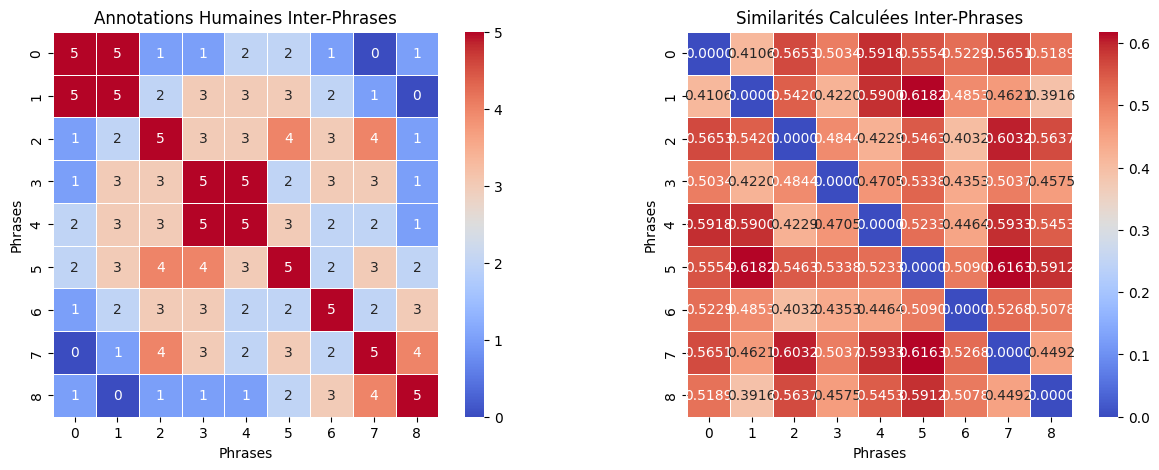

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Ajuster la forme de la matrice d'annotations humaines
annotations_inter_phrases_humaines = np.array(annotations_human)
# Créer des graphiques de barres pour chaque paire de phrases
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Graphique pour les annotations humaines
sns.heatmap(annotations_inter_phrases_humaines, cmap='coolwarm', annot=True, fmt='d', linewidths=.5, square=True, ax=axes[0])
axes[0].set_title('Annotations Humaines Inter-Phrases')
axes[0].set_xlabel('Phrases')
axes[0].set_ylabel('Phrases')

# Graphique pour les similarités calculées
sns.heatmap(bray_curtis_similarite, cmap='coolwarm', annot=True, fmt='.4f', linewidths=.5, square=True, ax=axes[1])
axes[1].set_title('Similarités Calculées Inter-Phrases')
axes[1].set_xlabel('Phrases')
axes[1].set_ylabel('Phrases')

plt.show()

<ipython-input-45-38edf66a367a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['1-2', '1-3', '2-3'], y=coherences_calculees_entre_paragraphes, palette='coolwarm', ax=axes[1])


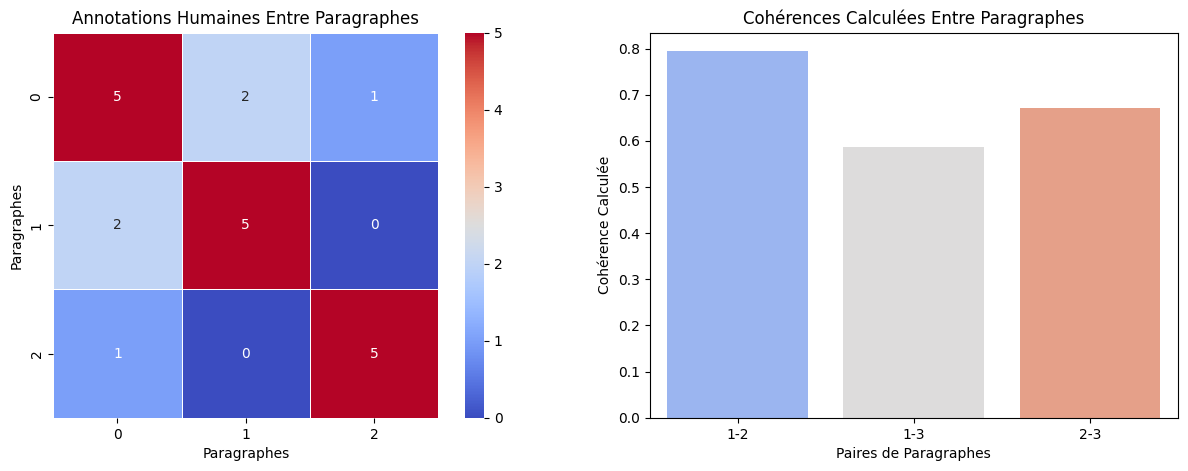

In [ ]:
# Créer des graphiques de barres pour chaque paire de paragraphes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Graphique pour les annotations humaines entre paragraphes
sns.heatmap(annotations_entre_paragraphes_humaines, cmap='coolwarm', annot=True, fmt='d', linewidths=.5, square=True, ax=axes[0])
axes[0].set_title('Annotations Humaines Entre Paragraphes')
axes[0].set_xlabel('Paragraphes')
axes[0].set_ylabel('Paragraphes')

# Graphique pour les cohérences calculées entre paragraphes
coherences_calculees_entre_paragraphes = [0.794682715, 0.5877247184000001, 0.6702597088888889]
sns.barplot(x=['1-2', '1-3', '2-3'], y=coherences_calculees_entre_paragraphes, palette='coolwarm', ax=axes[1])
axes[1].set_title('Cohérences Calculées Entre Paragraphes')
axes[1].set_xlabel('Paires de Paragraphes')
axes[1].set_ylabel('Cohérence Calculée')

plt.show()


In [ ]:
from scipy.stats import pearsonr

# Annotations humaines
annotations_human = [
    5, 5, 1, 1, 2, 2, 1, 1, 1,
    5, 5, 2, 3, 3, 3, 2, 1, 1,
    1, 2, 5, 3, 3, 4, 3, 4, 1,
    1, 3, 3, 5, 5, 2, 3, 3, 1,
    2, 3, 3, 5, 5, 3, 2, 2, 1,
    2, 3, 4, 2, 3, 5, 2, 3, 2,
    1, 2, 3, 3, 2, 2, 5, 2, 3,
    1, 1, 4, 3, 2, 3, 2, 5, 4,
    1, 1, 1, 1, 1, 2, 3, 4, 5
]

# Transformer la matrice de similarité en une liste de similarités
similarities_flat = similarities.flatten()

# Calculer le coefficient de corrélation de Pearson
correlation_coefficient, _ = pearsonr(annotations_human, similarities_flat)

# Afficher le coefficient de corrélation de Pearson
print(f"Coefficient de corrélation de Pearson : {correlation_coefficient:.4f}")

Coefficient de corrélation de Pearson : 0.5037


In [ ]:
from sklearn.metrics import r2_score

# Transformer les annotations humaines en un tableau NumPy
annotations_human = np.array(annotations_human)

# Aplatir la matrice de similarité pour l'utiliser comme variable indépendante
similarities_flat = bray_curtis_distance_matrix.flatten()

# Calculer le score R2
r2 = r2_score(annotations_human, similarities_flat)

# Afficher le score R2
print(f"Score R2 : {r2:.4f}")


Score R2 : -2.9558


In [ ]:
from sklearn.metrics import mean_squared_error

similarities_flat = bray_curtis_distance_matrix.flatten()
# Calculer la Mean Squared Error (MSE)
mse = mean_squared_error(annotations_human, similarities_flat)

# Afficher la MSE
print(f"Mean Squared Error : {mse:.4f}")


Mean Squared Error : 7.2436


# **Agrégation des Scores :**

In [ ]:
import numpy as np

bray_curtis_similarite = np.array([
    [0., 0.41063457, 0.5652972, 0.50338427, 0.59176026, 0.5553813, 0.52286206, 0.56506054, 0.51894196],
    [0.41063457, 0., 0.54199738, 0.42197072, 0.5900051, 0.6182314, 0.48534714, 0.4621433, 0.39164944],
    [0.5652972, 0.54199738, 0., 0.48436436, 0.42286823, 0.54634807, 0.40320282, 0.6032283, 0.56371752],
    [0.50338427, 0.42197072, 0.48436436, 0., 0.47047033, 0.53384999, 0.43531425, 0.50370473, 0.45751327],
    [0.59176026, 0.5900051, 0.42286823, 0.47047033, 0., 0.52333544, 0.44641936, 0.59328781, 0.54525717],
    [0.5553813, 0.6182314, 0.54634807, 0.53384999, 0.52333544, 0., 0.50900549, 0.61626022, 0.59121705],
    [0.52286206, 0.48534714, 0.40320282, 0.43531425, 0.44641936, 0.50900549, 0., 0.52678257, 0.50780858],
    [0.56506054, 0.4621433, 0.6032283, 0.50370473, 0.59328781, 0.61626022, 0.52678257, 0., 0.44924016],
    [0.51894196, 0.39164944, 0.56371752, 0.45751327, 0.54525717, 0.59121705, 0.50780858, 0.44924016, 0.]
])

Cohérence au niveau du paragraphe :

In [ ]:
sous_matrice_premier_paragraphe = bray_curtis_similarite[:2, :2]
moyenne_premier_paragraphe = np.mean(sous_matrice_premier_paragraphe)
print("Cohérence du Premier Paragraphe (Moyenne) :",1 - moyenne_premier_paragraphe)

sous_matrice_deuxieme_paragraphe = bray_curtis_similarite[1:6, 1:6]
moyenne_deuxieme_paragraphe = np.mean(sous_matrice_deuxieme_paragraphe)
print("Cohérence du Deuxième Paragraphe (Moyenne) :", 1 - moyenne_deuxieme_paragraphe)

sous_matrice_troisieme_paragraphe = bray_curtis_similarite[6:, 6:]
moyenne_troisieme_paragraphe = np.mean(sous_matrice_troisieme_paragraphe)
print("Cohérence du Troisieme Paragraphe (Moyenne) :", 1 - moyenne_troisieme_paragraphe)

Cohérence du Premier Paragraphe (Moyenne) : 0.794682715
Cohérence du Deuxième Paragraphe (Moyenne) : 0.5877247184000001
Cohérence du Troisieme Paragraphe (Moyenne) : 0.6702597088888889


Cohérence entre les paragraphes :

In [ ]:
between_paragraphs_coherence = np.mean(np.tril(bray_curtis_similarite, k=-1))
print(f"Cohérence entre les paragraphes :  {between_paragraphs_coherence}")

Cohérence entre les paragraphes :  0.2281217575308642


Cohérence pour l'ensemble du texte :

In [ ]:
whole_text_coherence = np.mean(bray_curtis_similarite)
print(f"Cohérence pour l'ensemble du texte : {whole_text_coherence}")

Cohérence pour l'ensemble du texte : 0.4562435150617284


In [ ]:
# Calculer la cohérence pour chaque paragraphe
#Bert modele
coherences_paragraphes = []
for i, annotation in enumerate(annotations_entre_paragraphes):
    moyenne_paragraphe = np.mean(annotation)
    coherences_paragraphes.append(moyenne_paragraphe)

# Calculer la moyenne des cohérences entre les paragraphes
coherence_entre_paragraphes = np.mean(coherences_paragraphes)

# Afficher les résultats
for i, coherence in enumerate(coherences_paragraphes):
    print(f"Cohérence du Paragraphe {i+1} : {coherence}")
print()
# Calculer la cohérence entre différentes paires de paragraphes
coherences_entre_paires = []

# Définir les indices des paires de paragraphes
indices_paires = [(0, 1), (0, 2), (1, 2)]

for i, j in indices_paires:
    # Calculer la cohérence entre les deux paires de paragraphes
    moyenne_entre_paires_ij = np.mean([annotations_entre_paragraphes[i], annotations_entre_paragraphes[j]])
    coherences_entre_paires.append(moyenne_entre_paires_ij)

# Afficher les résultats pour la cohérence entre paires de paragraphes spécifiques
for (i, j), coherence_entre_paires in zip(indices_paires, coherences_entre_paires):
    print(f"Cohérence entre les paragraphes {i+1} et {j+1} : {coherence_entre_paires}")
print()

# Afficher la cohérence entre les paragraphes
print(f"Cohérence entre les paragraphes : {coherence_entre_paragraphes}")



Cohérence du Paragraphe 1 : 3.0
Cohérence du Paragraphe 2 : 3.0
Cohérence du Paragraphe 3 : 2.3333333333333335

Cohérence entre les paragraphes 1 et 2 : 3.0
Cohérence entre les paragraphes 1 et 3 : 2.6666666666666665
Cohérence entre les paragraphes 2 et 3 : 2.6666666666666665

Cohérence entre les paragraphes : 2.777777777777778


In [ ]:
import numpy as np

# Nombre de phrases dans chaque paragraphe
phrases_paragraphe = [2, 5, 2]

# Initialiser la variable pour stocker les similarités entre les paragraphes
similarites_entre_paragraphes = []

# Calculer la similarité entre les paragraphes
for i in range(len(phrases_paragraphe) - 1):
    debut_i = sum(phrases_paragraphe[:i])
    fin_i = debut_i + phrases_paragraphe[i]

    for j in range(i + 1, len(phrases_paragraphe)):
        debut_j = sum(phrases_paragraphe[:j])
        fin_j = debut_j + phrases_paragraphe[j]

        # Calculer la similarité entre les deux paragraphes
        similarite_entre_paragraphes_ij = np.mean(similarities[debut_i:fin_i, debut_j:fin_j])
        similarites_entre_paragraphes.append(similarite_entre_paragraphes_ij)

        # Afficher les résultats
        print(f"Similarité entre le Paragraphe {i+1} et le Paragraphe {j+1} : {similarite_entre_paragraphes_ij}")

# Afficher la similarité pour tout le texte
similarite_totale = np.mean(similarites_entre_paragraphes)
print(f"Similarité pour tout le texte : {similarite_totale}")


Similarité entre le Paragraphe 1 et le Paragraphe 2 : 0.6292954683303833
Similarité entre le Paragraphe 1 et le Paragraphe 3 : 0.6928971409797668
Similarité entre le Paragraphe 2 et le Paragraphe 3 : 0.5946613550186157
Similarité pour tout le texte : 0.6389513611793518


# **Analyse des Résultats :**

Les résultats de l'analyse de cohérence du texte indiquent des variations de cohérence à différents niveaux. Le premier paragraphe présente une cohérence moyenne de 0.79, le deuxième de 0.59 et le troisième de 0.67. La cohérence entre les paragraphes est de 0.23, et la cohérence pour l'ensemble du texte est de 0.46. Ces résultats suggèrent des nuances de cohérence à différents niveaux d'analyse.

Les variations de cohérence entre les paragraphes et pour l'ensemble du texte dues à des transitions inadéquates ou à un manque de liens logiques et sémantiques entre les idées.
La première paragraphe est sur le théme de la musique, la deuxième sur la nature, et la troisième sur la technologie. Il n'ya pas de lien entre ses thèmes ce qui explique la faible cohérence entre les paragraphes.

Les outils linguistiques, tels que les marqueurs de référence et les connecteurs, jouent un rôle crucial dans l'assurance de la cohésion textuelle. La cohérence entre les phrases pour chaque paragraphes n'est pas idéal puisque aprés la lemmatization, tous les connecteurs pour lier les phrases pour mieux donner une idée sur la cohérence entre les phrases sont éliminer.

La diversité des sujets abordés dans le texte, tels que la musique, la nature et l'intelligence artificielle, peut entraîner une faible cohérence entre les idées, car il n'y a pas de lien évident entre ces sujets, et un manque de liens logiques et sémantiques entre les idées a causé une faible cohérence pour l'ensemble du texte.

# **Réajustement du Modèle :**

In [ ]:
#utiliser GPT-3 comme un modèle
from transformers import GPT2Model, GPT2Tokenizer
import torch

# Load pre-trained model and tokenizer
model_name = 'gpt2'  # You can also use other pre-trained GPT models like 'gpt2-medium', 'gpt2-large', etc.
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

# Pre-process and encode the sentences

encoded_sentences = tokenizer(preprocess_list, return_tensors='pt', padding=True, truncation=True)

# Generate vector representations
with torch.no_grad():
    outputs = model(**encoded_sentences)
    vector_representations = outputs.last_hidden_state.mean(dim=1)  # Mean pooling to get a single vector representation for each sentence

# Calculate the Bray-Curtis distance between each pair of phrases
bray_curtis_distance_matrix = torch.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    for j in range(i, len(sentences)):
        numerator = torch.sum(torch.abs(vector_representations[i] - vector_representations[j]))
        denominator = torch.sum(vector_representations[i] + vector_representations[j])
        bray_curtis_distance_matrix[i][j] = numerator / denominator

print(bray_curtis_distance_matrix)


tensor([[0.0000, 0.3893, 0.5279],
        [0.0000, 0.0000, 0.7848],
        [0.0000, 0.0000, 0.0000]])


In [ ]:
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Your data
data = [
    ('note resonate captivating symphony transcending linguistic barrier', 'positive'),
    ('music universal language transport listener unexplored emotional world', 'positive'),
    ('summit mountain silence reign sunrise', 'positive'),
    ('nature revealing tranquil magic persistent life', 'positive'),
    ('bird initiate morning melody', 'positive'),
    ('leaf rustle gently caress wind', 'positive'),
    ('dawn becomes unique canvas painted light day', 'positive'),
    ('artificial intelligence life robot become companion virtual reality offer immersive experience smart connectivity daily routine', 'positive'),
    ('code algorithm shape interaction digital world', 'positive')
]

# Separate data into sentences and labels
sentences, labels = zip(*data)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(sentences, encoded_labels, test_size=0.2, random_state=42)

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  # Use eos_token as padding token

model = GPT2ForSequenceClassification.from_pretrained('gpt2')

# Create a custom dataset
class CustomDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {"text": self.texts[idx], "label": self.labels[idx]}

train_dataset = CustomDataset(train_sentences, train_labels)
val_dataset = CustomDataset(val_sentences, val_labels)

# Create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set up optimizer and criterion
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Fine-tuning
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        inputs = tokenizer(batch["text"], return_tensors="pt", padding=True, truncation=True).to(device)
        labels = torch.tensor(batch["label"]).to(device)

        optimizer.zero_grad()
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

# Evaluation on the validation set
model.eval()
all_preds = []

with torch.no_grad():
    for batch in val_dataloader:
        inputs = tokenizer(batch["text"], return_tensors="pt", padding=True, truncation=True).to(device)
        labels = torch.tensor(batch["label"]).to(device)

        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())

# Calculate accuracy on the validation set
val_accuracy = (val_labels == all_preds).mean()
print(f'Accuracy on validation set: {val_accuracy}')


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-51-1267e04f886e>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch["label"]).to(device)


Accuracy on validation set: 0.0


<ipython-input-51-1267e04f886e>:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch["label"]).to(device)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split

# Charger le tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Définir vos phrases et annotations
sentences = [
    'The notes resonate, creating a captivating symphony, transcending linguistic barriers',
    'Music, a universal language, transports the listener to unexplored emotional worlds',
    'At the summit of a mountain, silence reigns before the sunrise',
    'Nature awakens, revealing the tranquil magic of persistent life',
    'Birds initiate their morning melody',
    'Leaves rustle gently with the caress of the wind',
    'Each dawn becomes a unique canvas painted by the light of the emerging day',
    'Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine',
    'Codes and algorithms shape our interaction with the digital world'
]

annotations = [
    [5, 5, 1, 1, 2, 2, 1, 1, 1],
    [5, 5, 2, 3, 3, 3, 2, 1, 1],
    [1, 2, 5, 3, 3, 4, 3, 4, 1],
    [1, 3, 3, 5, 5, 2, 3, 3, 1],
    [2, 3, 3, 5, 5, 3, 2, 2, 1],
    [2, 3, 4, 2, 3, 5, 2, 3, 2],
    [1, 2, 3, 3, 2, 2, 5, 2, 3],
    [1, 1, 4, 3, 2, 3, 2, 5, 4],
    [1, 1, 1, 1, 1, 2, 3, 4, 5]
]

# train/ test
train_sentences, test_sentences, train_annotations, test_annotations = train_test_split(
    sentences, annotations, test_size=0.2, random_state=42
)

# Créer un ensemble de données personnalisé
class CohesionDataset(Dataset):
    def __init__(self, sentences, annotations, tokenizer, max_length=128):
        self.sentences = sentences
        self.annotations = annotations
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.sentences[idx],
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.annotations[idx], dtype=torch.float32)
        }

# Créer des ensembles de données pour l'entraînement et le test
train_dataset = CohesionDataset(train_sentences, train_annotations, tokenizer)
test_dataset = CohesionDataset(test_sentences, test_annotations, tokenizer)

# Créer des chargeurs de données
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Charger le modèle BERT pour la régression
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(train_annotations[0]))

# Définir les paramètres d'entraînement
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.MSELoss()
num_epochs = 3

# Entraînement du modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        inputs = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = criterion(outputs.logits.squeeze(), inputs['labels'].squeeze())
        loss.backward()
        optimizer.step()

# Évaluation sur l'ensemble de test
model.eval()
total_loss = 0.0
with torch.no_grad():
    for batch in test_dataloader:
        inputs = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**inputs)
        loss = criterion(outputs.logits.squeeze(), inputs['labels'].squeeze())
        total_loss += loss.item()

average_loss = total_loss / len(test_dataloader)
print(f"Loss on test set: {average_loss}")

# Sauvegarder le modèle fine-tuné
model.save_pretrained('fine_tuned_bert_regression_model')
tokenizer.save_pretrained('fine_tuned_bert_regression_model')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Loss on test set: 9.120977401733398


('fine_tuned_bert_regression_model/tokenizer_config.json',
 'fine_tuned_bert_regression_model/special_tokens_map.json',
 'fine_tuned_bert_regression_model/vocab.txt',
 'fine_tuned_bert_regression_model/added_tokens.json')

In [ ]:
#Bert
from transformers import BertTokenizer, BertModel
import torch

# Charger le modèle BERT et le tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Fonction pour obtenir la représentation vectorielle d'une phrase avec BERT
def get_bert_embedding(sentences):
    # Tokeniser la phrase
    tokens = tokenizer(sentences, return_tensors='pt')

    # Obtenir la représentation vectorielle à partir du modèle BERT
    with torch.no_grad():
        outputs = model(**tokens)

    # Utiliser la sortie de la couche d'embedding [CLS] pour représenter la phrase
    embeddingBert = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    return embeddingBert

# Appliquer la fonction aux phrases prétraitées
sentence_embeddings = [get_bert_embedding(sentences) for sentences in preprocess_list]

# Afficher les représentations vectorielles des phrases
for i, embeddingBert in enumerate(sentence_embeddings, 1):
    print(f"Représentation vectorielle de la phrase {i} : {embeddingBert}")


Représentation vectorielle de la phrase 1 : [-2.67409056e-01  1.36760715e-02  2.74516135e-01 -3.35978210e-01
  3.10753465e-01 -2.85466127e-02  3.22488815e-01  1.16738670e-01
 -9.67942178e-02 -5.56002259e-01  3.93843591e-01 -3.24360318e-02
  2.47861370e-01  5.70119321e-01 -2.41677389e-01  5.47827125e-01
  2.51613647e-01 -2.56295323e-01  2.13125527e-01 -1.70231052e-02
  2.04625845e-01 -1.63024157e-01 -8.03930685e-02  1.57254562e-01
  4.82126445e-01 -1.47641808e-01 -2.83450335e-01  5.69184005e-01
 -2.91297555e-01  6.03508875e-02  2.38011703e-01  3.61269504e-01
  5.22259846e-02 -1.23942249e-01 -2.82916576e-01 -1.36687234e-01
 -2.09283829e-01 -1.20916277e-01 -9.63016320e-03 -1.09672517e-01
 -6.05609655e-01 -9.37527567e-02  1.95072204e-01  1.35590270e-01
 -6.41237199e-02 -3.24804187e-01 -5.54985583e-01 -2.76059598e-01
 -6.81224912e-02 -6.53932020e-02 -4.32907432e-01  1.38589665e-01
 -1.42756268e-01 -1.91084176e-01 -2.07150847e-01  2.79180527e-01
 -9.75637138e-02 -3.35655510e-01  3.33932072e-

In [ ]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Utiliser la fonction cosine_similarity de scikit-learn pour calculer la similarité cosinus
similarities = cosine_similarity(sentence_embeddings)

# Afficher la matrice de similarité
print("Matrice de similarité cosinus entre les phrases :")
print("    ", end="")
for i in range(len(preprocess_list)):
    print(f"{i + 1}     ", end=" ")
print()
print()
for i in range(len(preprocess_list)):
    row = f"{i + 1}   "
    for j in range(len(preprocess_list)):
        if i != j:
            row += f"{similarities[i, j]:.4f} "
        else:
            row += "1.0000 "
    print(row.strip())



Matrice de similarité cosinus entre les phrases :
    1      2      3      4      5      6      7      8      9      

1   1.0000 0.7876 0.6179 0.7171 0.5699 0.5731 0.7167 0.6648 0.6428
2   0.7876 1.0000 0.6053 0.7316 0.5542 0.5484 0.6588 0.7412 0.7227
3   0.6179 0.6053 1.0000 0.6370 0.7045 0.4893 0.6363 0.5160 0.5332
4   0.7171 0.7316 0.6370 1.0000 0.6156 0.5212 0.6724 0.7140 0.6378
5   0.5699 0.5542 0.7045 0.6156 1.0000 0.5084 0.6651 0.4933 0.5852
6   0.5731 0.5484 0.4893 0.5212 0.5084 1.0000 0.6642 0.5590 0.6138
7   0.7167 0.6588 0.6363 0.6724 0.6651 0.6642 1.0000 0.6198 0.6745
8   0.6648 0.7412 0.5160 0.7140 0.4933 0.5590 0.6198 1.0000 0.7509
9   0.6428 0.7227 0.5332 0.6378 0.5852 0.6138 0.6745 0.7509 1.0000


In [ ]:
from scipy.stats import pearsonr

# Annotations humaines
annotations_human = [
    5, 5, 1, 1, 2, 2, 1, 1, 1,
    5, 5, 2, 3, 3, 3, 2, 1, 1,
    1, 2, 5, 3, 3, 4, 3, 4, 1,
    1, 3, 3, 5, 5, 2, 3, 3, 1,
    2, 3, 3, 5, 5, 3, 2, 2, 1,
    2, 3, 4, 2, 3, 5, 2, 3, 2,
    1, 2, 3, 3, 2, 2, 5, 2, 3,
    1, 1, 4, 3, 2, 3, 2, 5, 4,
    1, 1, 1, 1, 1, 2, 3, 4, 5
]

# Transformer la matrice de similarité en une liste de similarités
similarities_flat = similarities.flatten()

# Calculer le coefficient de corrélation de Pearson
correlation_coefficient, _ = pearsonr(annotations_human, similarities_flat)

# Afficher le coefficient de corrélation de Pearson
print(f"Coefficient de corrélation de Pearson : {correlation_coefficient:.4f}")

Coefficient de corrélation de Pearson : 0.5037


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split

# Charger le tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Définir vos phrases et annotations
sentences = [
    'The notes resonate, creating a captivating symphony, transcending linguistic barriers',
    'Music, a universal language, transports the listener to unexplored emotional worlds',
    'At the summit of a mountain, silence reigns before the sunrise',
    'Nature awakens, revealing the tranquil magic of persistent life',
    'Birds initiate their morning melody',
    'Leaves rustle gently with the caress of the wind',
    'Each dawn becomes a unique canvas painted by the light of the emerging day',
    'Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine',
    'Codes and algorithms shape our interaction with the digital world'
]

annotations = [
    [5, 5, 1, 1, 2, 2, 1, 1, 1],
    [5, 5, 2, 3, 3, 3, 2, 1, 1],
    [1, 2, 5, 3, 3, 4, 3, 4, 1],
    [1, 3, 3, 5, 5, 2, 3, 3, 1],
    [2, 3, 3, 5, 5, 3, 2, 2, 1],
    [2, 3, 4, 2, 3, 5, 2, 3, 2],
    [1, 2, 3, 3, 2, 2, 5, 2, 3],
    [1, 1, 4, 3, 2, 3, 2, 5, 4],
    [1, 1, 1, 1, 1, 2, 3, 4, 5]
]

# train/ test
train_sentences, test_sentences, train_annotations, test_annotations = train_test_split(
    sentences, annotations, test_size=0.2, random_state=42
)

# Créer un ensemble de données personnalisé
class CohesionDataset(Dataset):
    def __init__(self, sentences, annotations, tokenizer, max_length=128):
        self.sentences = sentences
        self.annotations = annotations
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.sentences[idx],
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.annotations[idx], dtype=torch.float32)
        }

# Créer des ensembles de données pour l'entraînement et le test
train_dataset = CohesionDataset(train_sentences, train_annotations, tokenizer)
test_dataset = CohesionDataset(test_sentences, test_annotations, tokenizer)

# Créer des chargeurs de données
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Charger le modèle BERT pour la régression
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(train_annotations[0]))

# Définir les paramètres d'entraînement
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.MSELoss()
num_epochs = 3

# Entraînement du modèle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        inputs = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = criterion(outputs.logits.squeeze(), inputs['labels'].squeeze())
        loss.backward()
        optimizer.step()

# Évaluation sur l'ensemble de test
model.eval()
total_loss = 0.0
with torch.no_grad():
    for batch in test_dataloader:
        inputs = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**inputs)
        loss = criterion(outputs.logits.squeeze(), inputs['labels'].squeeze())
        total_loss += loss.item()

average_loss = total_loss / len(test_dataloader)
print(f"Loss on test set: {average_loss}")

# Sauvegarder le modèle fine-tuné
model.save_pretrained('fine_tuned_bert_regression_model')
tokenizer.save_pretrained('fine_tuned_bert_regression_model')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Loss on test set: 8.64894962310791


('fine_tuned_bert_regression_model/tokenizer_config.json',
 'fine_tuned_bert_regression_model/special_tokens_map.json',
 'fine_tuned_bert_regression_model/vocab.txt',
 'fine_tuned_bert_regression_model/added_tokens.json')

# **Utilisation des techniques d'apprentissage automatique pour automatiser l’attribution de la note de cohérence**

In [ ]:
!pip install joblib

In [ ]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump

# Téléchargez les ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Données du corpus
corpus = """
The notes resonate, creating a captivating symphony, transcending linguistic barriers. Music, a universal language, transports the listener to unexplored emotional worlds.

At the summit of a mountain, silence reigns before the sunrise. Nature awakens, revealing the tranquil magic of persistent life. Birds initiate their morning melody. Leaves rustle gently with the caress of the wind. Each dawn becomes a unique canvas painted by the light of the emerging day.

Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine. Codes and algorithms shape our interaction with the digital world.
"""

# Séparez le corpus en phrases
paragraphs = corpus.split('\n')
sentences = [sentence.strip() for paragraph in paragraphs for sentence in paragraph.split('.') if sentence.strip()]

# Annotations inter-phrastiques
annotations_inter_phrases = [
    [5, 1, 1, 2, 2, 1, 1, 1],
    [2, 3, 3, 3, 2, 1, 1],
    [3, 3, 4, 3, 4, 1],
    [5, 2, 3, 3, 1],
    [3, 2, 2, 1],
    [2, 3, 2],
    [2, 3],
    [4]
]

# Prétraitement des phrases
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    preprocessed_sentences = []

    for sentence in sent_tokenize(text):
        words = word_tokenize(sentence)
        words = [word for word in words if word.isalnum()]
        filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
        preprocessed_sentence = ' '.join(filtered_words)
        preprocessed_sentences.append(preprocessed_sentence)

    return preprocessed_sentences

# Appliquer le prétraitement aux phrases du corpus
preprocessed_sentences = preprocess_text(corpus)

# Utiliser le modèle BERT pour obtenir des représentations vectorielles des phrases
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embedding(sentences):
    tokens = tokenizer(sentences, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

# Appliquer la fonction aux phrases prétraitées
sentence_embeddings = [get_bert_embedding(sentence) for sentence in preprocessed_sentences]

# Calculer la similarité cosinus entre les vecteurs de représentation des phrases
similarities = np.array([[np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)) for b in sentence_embeddings] for a in sentence_embeddings])

# Aplatir la matrice de similarité
similarities_flat = similarities.flatten()

# Annotations humaines
annotations_human = [
    5, 5, 1, 1, 2, 2, 1, 1, 1,
    5, 5, 2, 3, 3, 3, 2, 1, 1,
    1, 2, 5, 3, 3, 4, 3, 4, 1,
    1, 3, 3, 5, 5, 2, 3, 3, 1,
    2, 3, 3, 5, 5, 3, 2, 2, 1,
    2, 3, 4, 2, 3, 5, 2, 3, 2,
    1, 2, 3, 3, 2, 2, 5, 2, 3,
    1, 1, 4, 3, 2, 3, 2, 5, 4,
    1, 1, 1, 1, 1, 2, 3, 4, 5
]

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(similarities_flat.reshape(-1, 1), annotations_human, test_size=0.2, random_state=42)

# Créez un modèle de régression linéaire
model = LinearRegression()

# Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Calculez l'erreur quadratique moyenne (MSE) sur l'ensemble de test
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on test set: {mse}")

# Sauvegardez le modèle pour une utilisation ultérieure
dump(model, 'coherence_model.joblib')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Mean Squared Error on test set: 1.2454935764809902


['coherence_model.joblib']

In [ ]:
import numpy as np
from joblib import load
from itertools import combinations
from transformers import BertTokenizer, BertModel
import torch
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Charger le modèle BERT et le tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Charger le modèle de prédiction de cohérence
loaded_model = load('coherence_model.joblib')

# Vos phrases
all_sentences = [
    'The notes resonate, creating a captivating symphony, transcending linguistic barriers',
    'Music, a universal language, transports the listener to unexplored emotional worlds',
    'At the summit of a mountain, silence reigns before the sunrise',
    'Nature awakens, revealing the tranquil magic of persistent life',
    'Birds initiate their morning melody',
    'Leaves rustle gently with the caress of the wind',
    'Each dawn becomes a unique canvas painted by the light of the emerging day',
    'Artificial intelligence simplifies our lives, robots become our companions, virtual reality offers immersive experiences, and smart connectivity transforms our daily routine',
    'Codes and algorithms shape our interaction with the digital world'
]

# Prétraitement des phrases
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    preprocessed_sentences = []

    for text_pair in texts:
        pair_sentences = ' '.join(text_pair)
        words = word_tokenize(pair_sentences)
        words = [word for word in words if word.isalnum()]
        filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
        preprocessed_sentence = ' '.join(filtered_words)
        preprocessed_sentences.append(preprocessed_sentence)

    return preprocessed_sentences

# Fonction pour obtenir la représentation vectorielle d'une phrase avec BERT
def get_bert_embedding(sentences):
    tokens = tokenizer(sentences, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

# Fonction pour prédire la cohérence
def predict_coherence(sentence_pairs):
    preprocessed_pairs = preprocess_text(sentence_pairs)
    pair_embeddings = [get_bert_embedding(pair) for pair in preprocessed_pairs]
    pair_similarities = np.array([[np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)) for b in pair_embeddings] for a in pair_embeddings])
    pair_similarities_flat = pair_similarities.flatten()
    coherence_prediction = loaded_model.predict(pair_similarities_flat.reshape(-1, 1))
    return coherence_prediction

# Obtenir toutes les paires possibles
sentence_pairs = list(combinations(all_sentences, 2))

# Prédire la cohérence pour chaque paire
predicted_coherences = predict_coherence(sentence_pairs)

# Afficher les prédictions
for pair, coherence in zip(sentence_pairs, predicted_coherences):
    print(f"Cohérence pour la paire {pair}: {coherence}")


Cohérence pour la paire ('The notes resonate, creating a captivating symphony, transcending linguistic barriers', 'Music, a universal language, transports the listener to unexplored emotional worlds'): 3.8848812580108643
Cohérence pour la paire ('The notes resonate, creating a captivating symphony, transcending linguistic barriers', 'At the summit of a mountain, silence reigns before the sunrise'): 3.533787727355957
Cohérence pour la paire ('The notes resonate, creating a captivating symphony, transcending linguistic barriers', 'Nature awakens, revealing the tranquil magic of persistent life'): 3.617403745651245
Cohérence pour la paire ('The notes resonate, creating a captivating symphony, transcending linguistic barriers', 'Birds initiate their morning melody'): 3.62833571434021
Cohérence pour la paire ('The notes resonate, creating a captivating symphony, transcending linguistic barriers', 'Leaves rustle gently with the caress of the wind'): 3.401792287826538
Cohérence pour la paire 